## Peer-graded Assignment
### Центральная предельная теорема своими руками

In [2]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
# Графики будут встраиваться в notebook
%matplotlib inline

## Распределение Хи-квадрат

Распределение χ 2 (хи-квадрат) с  k степенями свободы — это распределение суммы квадратов k независимых стандартных нормальных случайных величин.

Для эксперимента сгенерируем случайную выборку размером 1000 из распределения хи-квадрат со степенью свободы (df) равной 50.

In [3]:
k = 50
sample = sts.chi2.rvs(k, size = 1000)

Нарисуем гистограмму, иллюстрирующую полученную экспериментальную плотность распределения, а так же теоретические знаения плотности распределения.

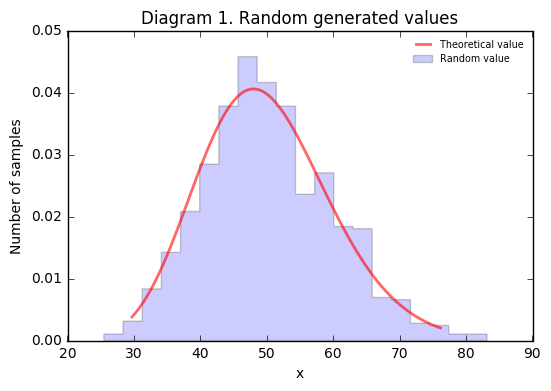

In [10]:
# Создаем массив координат X 
x = np.linspace(sts.chi2.ppf(0.01, k), sts.chi2.ppf(0.99, k), 100)
# Строим график теоретической плотности распределения
plt.plot(x, sts.chi2.pdf(x, k), 'r-', lw=2, alpha=0.6, label='Theoretical value')
# Строим гистограмму частоты, с которой встречаются случайно созданные числа
plt.hist(sample,normed=True,bins=20,histtype='stepfilled', alpha=0.2, label='Random value')
plt.legend(loc='best', frameon=False, fontsize='x-small')
plt.ylabel('Number of samples')
plt.xlabel('x')
plt.title('Diagram 1. Random generated values')
plt.show()

### Эксперимент

Для оценки распределения выборочного среднего нашей случайной величины для трех значений n (5, 10, 50) проведем 1000 выборок размера n из вышеописанного примера.

Математическое ожидание распределения χ 2  равняется $k$;   
Дисперсия распределения равна $2*k$ (где $k$ - число степеней свободы, в данном примере $k$ = 50).

Для каждого из графиков нарисуем теоретическое значение плотности нормального распределения с расчитанным мат. ожиданием и стандартным отклонеием.


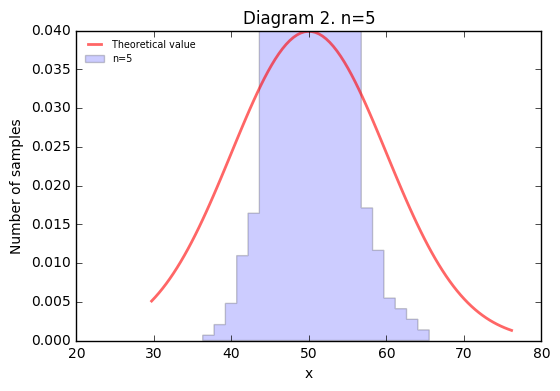

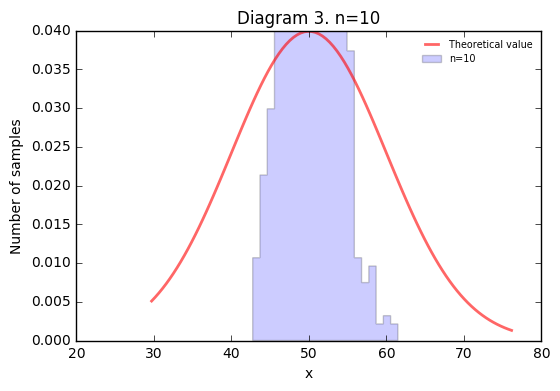

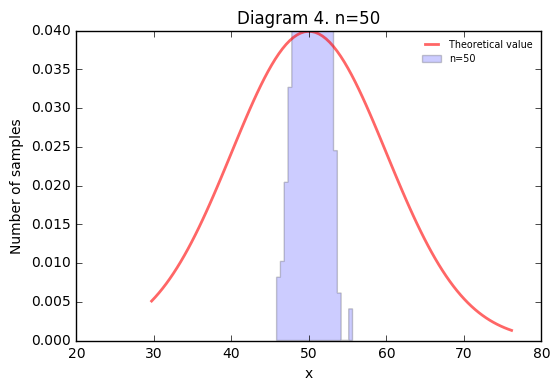

In [15]:
# Генератор нормального распределения
norm_rv = sts.norm(k, np.sqrt(2.0*k))

# Поочередно выбираем 5, 10 или 50 значений из имеющейся случайной величины
num_of_selections = [5, 10, 50];
for n in range(len(num_of_selections)):
    avg_values = np.zeros(1000)
    # Делаем 1000 выборок
    for i in range(1000):
        test = np.random.choice(sample, num_of_selections[n])
        avg_values[i] = np.mean(test)
    
    # Строим гистограмму, добавляем заголовок и надписи к осям
    plt.hist(avg_values, normed=True,bins=20,histtype='stepfilled', alpha=0.2, label='n='+str(num_of_selections[n]))
    
    # Добавляем теоретическую плотность стандартного распределения
    # Поскольку нас интересует теоретическая плотность, в качестве оси Х используем уже созданный для графика 1. 
    plt.plot(x, norm_rv.pdf(x), 'r-', lw=2, alpha=0.6, label='Theoretical value')
    
    # Добавляем надписи к осям и заголовок
    plt.title('Diagram ' + str(n + 2) + '. n=' + str(num_of_selections[n]))
    plt.ylabel('Number of samples')
    plt.xlabel('x')
    plt.legend(loc='best', frameon=False, fontsize='x-small')

    # Отобразим диаграмму
    plt.show()

### Заключение 

Поставленные эксперименты показывают, что
1. Среднее значение всех выборок совпадает со средним значением случайной величины, полученной в соответствии с хи-квадрат распределением. Теоретическое и практическое среднее значение совпадает и равно 50. 
2. С увеличением количества отбираемых элементов (в нашем эксперименте это 5, 10 и 50) уменьшается дисперсия полученных подвыборок. Значения х диаграммы занимают более узкий интервал. Это явно видно на диаграммах 2 - 4.

